# Importing necessary libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Listing all columns
pd.set_option('display.max_columns', None)

# Importing Boston Airbnb data

### Listings data

Contains the listing ID, complete description and their average review score

In [2]:
listings = pd.read_csv('boston/listings.csv')
print(listings.shape)
listings.head(2)

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

### Calendar data

Contains the listing ID, price and the availability of the listing on the given calendar date

In [3]:
calendar = pd.read_csv('boston/calendar.csv')
print(calendar.shape)
calendar.head()

(1308890, 4)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


### Reviews data

Contains all the reviews against each listing along with reviewer name and date of review

In [4]:
reviews = pd.read_csv('boston/reviews.csv')
print(reviews.shape)
reviews.head()

(68275, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


# Business objective

Using the Airbnb data, try and understand the pricing strategy for their various listings in Boston. Broad set of questions to be answered

1. What are the major trends in Boston listings price?
2. Identify the relationship between listing attributes and price?
2. Estimate the impact of different listing attributes on price ?

# Understanding the data

## Calendar data 

Contains the relevant information about the availability and price of the listings by the calendar date

In [5]:
# Dataset overview
print('Number of rows and columns in the dataset ', calendar.shape)
print('Datatypes of the columns -')
calendar.dtypes

Number of rows and columns in the dataset  (1308890, 4)
Datatypes of the columns -


listing_id     int64
date          object
available     object
price         object
dtype: object

In [6]:
# Casting variables accordingly
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace('$','').str.replace(',','').astype('float')
calendar['available'] = calendar['available'].apply(lambda x: True if x=='t' else False)
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [7]:
# Missing value overview
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [8]:
# Number of unique listings and listings with price
print('Number of unique listings: ', calendar.listing_id.nunique())
print('Number of unique listings with price: ', calendar[calendar['price'].notnull()].listing_id.nunique())

Number of unique listings:  3585
Number of unique listings with price:  2906


In [9]:
# Creating price summary by calendar by taking average
calendar_price_summary = calendar.groupby(['date']).agg({'price':['sum','count']}).reset_index()
calendar_price_summary.columns = ['_'.join(list(i)) for i in calendar_price_summary]
calendar_price_summary.head()

,date_,price_sum,price_count
0,2016-09-06,137395.0,570
1,2016-09-07,234709.0,932
2,2016-09-08,251497.0,999
3,2016-09-09,256884.0,981
4,2016-09-10,255106.0,956


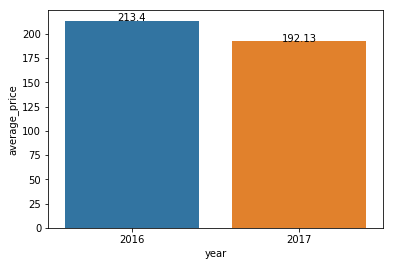

In [10]:
#Plot yearly trends
calendar_price_summary['year'] = calendar_price_summary['date_'].dt.year
year_price_summary = calendar_price_summary.groupby(['year']).sum().reset_index()
year_price_summary['average_price'] = year_price_summary['price_sum'] / year_price_summary['price_count']
g = sns.barplot(x = 'year', y = 'average_price', data=year_price_summary)
for index, row in year_price_summary.iterrows():
    g.text(row.name,row.average_price, round(row.average_price,2), color='black', ha="center")

plt.show()

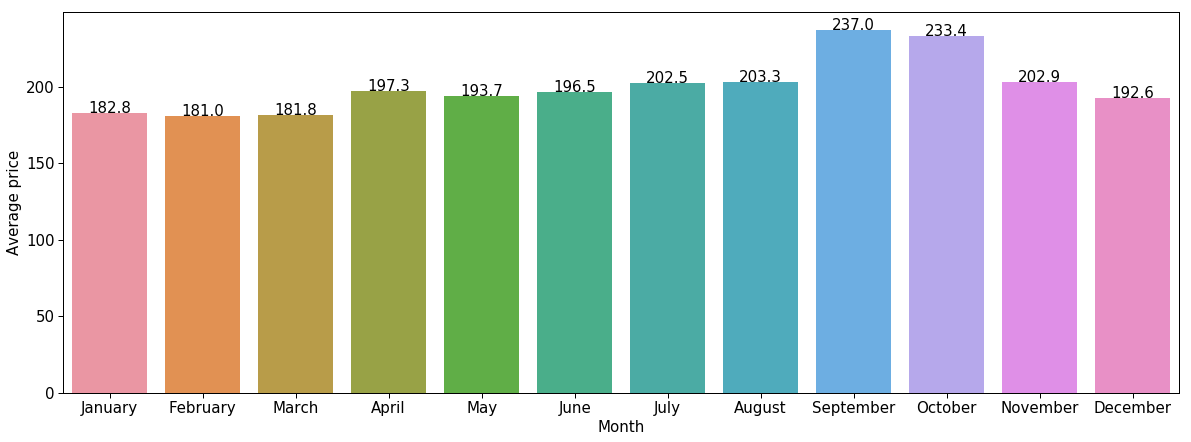

In [11]:
#Plot monthly trends
calendar_price_summary['Month'] = calendar_price_summary['date_'].apply(lambda x:x.strftime("%B"))
calendar_price_summary['mnth'] = calendar_price_summary['date_'].dt.month
month_price_summary = calendar_price_summary.groupby(['Month','mnth']).sum().reset_index()
month_price_summary['Average price'] = month_price_summary['price_sum'] / month_price_summary['price_count']
month_price_summary = month_price_summary.sort_values(['mnth','Month']).reset_index(drop=True)
sns.set_context("paper", rc={"font.size":15, "xtick.labelsize":15, "ytick.labelsize":15,"axes.labelsize":15})   
plt.figure(figsize = (20,7))
g = sns.barplot(x = 'Month', y = 'Average price', data=month_price_summary)
for index, row in month_price_summary.iterrows():
    g.text(row.name,row['Average price'], round(row['Average price'],1), color='black', ha="center",fontdict = {'size':15})

plt.show()

In [12]:
# Variation in monthly pricing trends
month_price_summary['Average price'].describe()['std']/month_price_summary['Average price'].describe()['mean']

0.09046651649839395

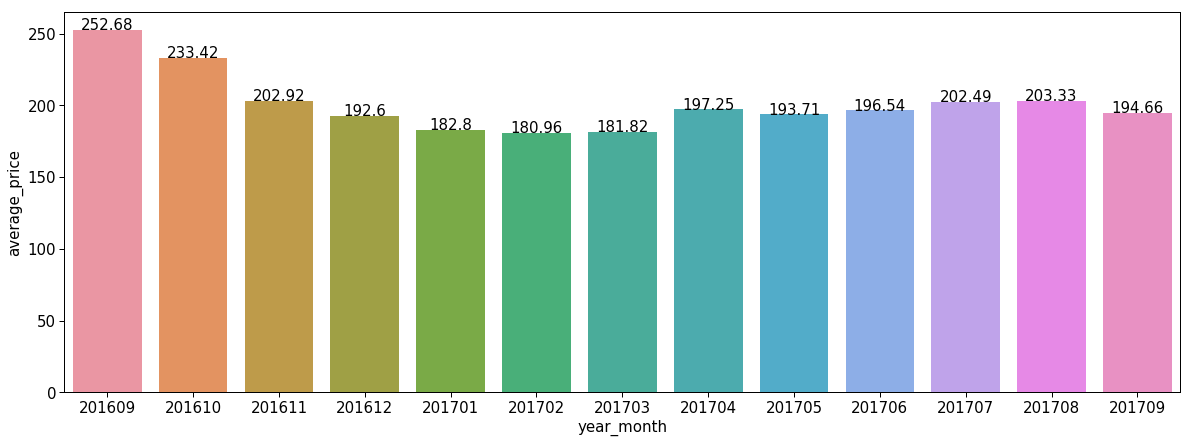

In [13]:
#Plot year-month trends
calendar_price_summary['year_month'] = calendar_price_summary['date_'].dt.year*100 + calendar_price_summary['date_'].dt.month
year_month_price_summary = calendar_price_summary.groupby(['year_month']).sum().reset_index()
year_month_price_summary['average_price'] = year_month_price_summary['price_sum'] / year_month_price_summary['price_count']
plt.figure(figsize = (20,7))
g = sns.barplot(x = 'year_month', y = 'average_price', data=year_month_price_summary)
for index, row in year_month_price_summary.iterrows():
    g.text(row.name,row.average_price, round(row.average_price,2), color='black', ha="center")

plt.show()

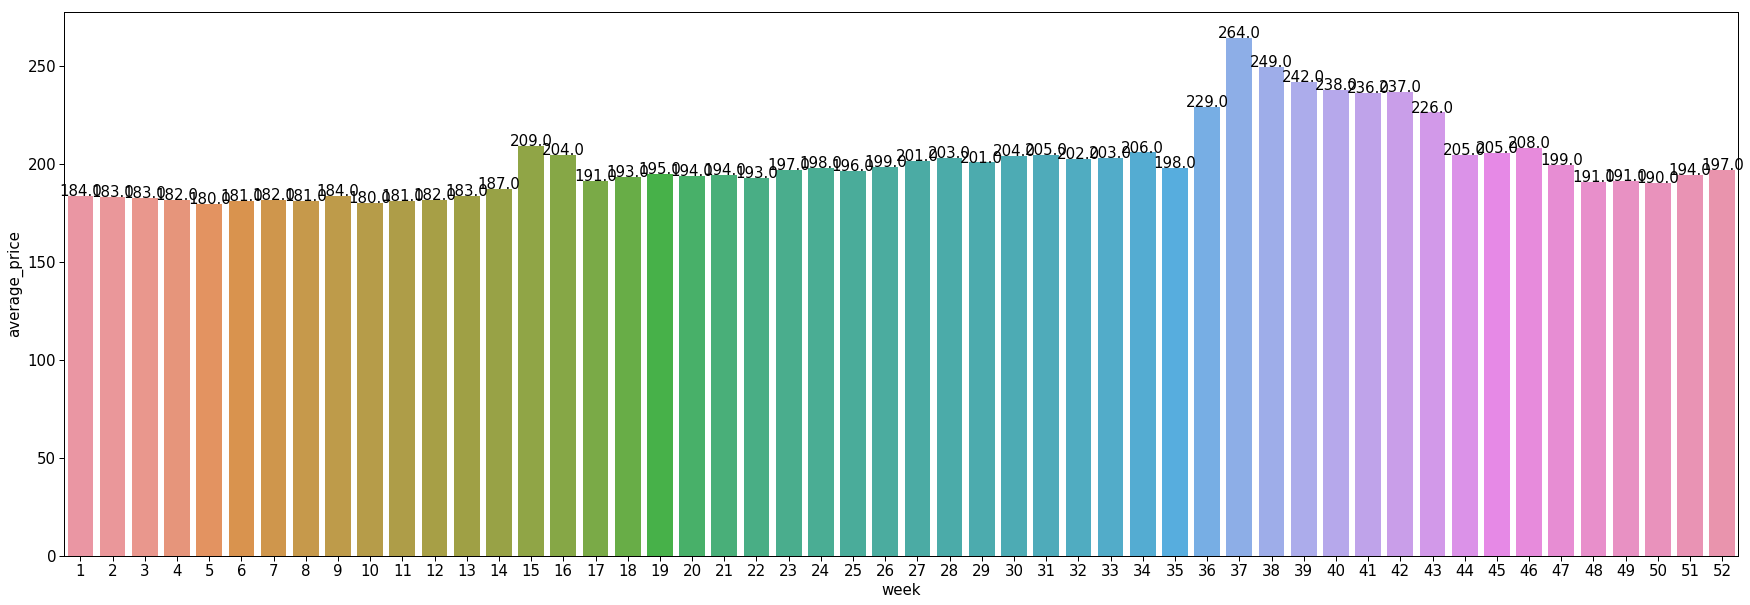

In [14]:
#Plot weekly trends
calendar_price_summary['week'] = calendar_price_summary['date_'].dt.week
week_price_summary = calendar_price_summary.groupby(['week']).sum().reset_index()
week_price_summary['average_price'] = week_price_summary['price_sum'] / week_price_summary['price_count']
plt.figure(figsize = (30,10))
g = sns.barplot(x = 'week', y = 'average_price', data=week_price_summary)
for index, row in week_price_summary.iterrows():
    g.text(row.name,row.average_price, round(row.average_price,0), color='black', ha="center")

plt.show()

## Listings data

Contains various attributes of a listing

In [15]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [16]:
# Extract relevant columns from an initial look at the data
relevant_columns = ['id', 'street', 'neighbourhood_cleansed', 'city', 
                    'host_id', 'host_since', 'host_location', 'host_response_time', 'host_response_rate','host_acceptance_rate',
                    'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
                   'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit']
listings2 = listings[relevant_columns].copy()
listings2.head()

,id,street,neighbourhood_cleansed,city,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit
0,12147973,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,31303940,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN
1,3075044,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,2572247,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00
2,6976,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,16701,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,$65.00,$395.00,"$1,350.00",NaN
3,1436513,"Boston, MA, United States",Roslindale,Boston,6031442,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$75.00,NaN,NaN,$100.00
4,7651065,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Boston,15396970,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$79.00,NaN,NaN,NaN


In [17]:
# Check how many listings have price attribute in the listings data
listings2[['price', 'weekly_price', 'monthly_price']].isnull().sum()

price               0
weekly_price     2693
monthly_price    2697
dtype: int64

### Compare average price for a listing from Calendar data with listing data

In [18]:
# Calculate average price per listing across all available timeperiod
calendar_prices = calendar[calendar['price'].notnull()].groupby(['listing_id'])['price'].mean().reset_index()
calendar_prices.head()

,listing_id,price
0,3353,35.204819
1,5506,147.267442
2,6695,197.407407
3,6976,65.000000
4,8792,154.000000


In [19]:
# Merge with listings data
listings_calendar = listings2.merge(calendar_prices, how ='left', left_on = ['id'], right_on = ['listing_id'], suffixes = ('', '_cal'))
print(listings_calendar.shape)
listings_calendar.head()

(3585, 25)


,id,street,neighbourhood_cleansed,city,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,listing_id,price_cal
0,12147973,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,31303940,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,NaN,NaN
1,3075044,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,2572247,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,3075044.0,67.81337
2,6976,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,16701,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,$65.00,$395.00,"$1,350.00",NaN,6976.0,65.00000
3,1436513,"Boston, MA, United States",Roslindale,Boston,6031442,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$75.00,NaN,NaN,$100.00,1436513.0,75.00000
4,7651065,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Boston,15396970,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$79.00,NaN,NaN,NaN,7651065.0,79.00000


In [20]:
# Assess coverage of listing price in calendar data
listings_calendar[['price', 'price_cal']].isnull().sum()

price          0
price_cal    679
dtype: int64

In [22]:
# Compare
listings_calendar['price'] = listings_calendar['price'].apply(lambda x: float(x.split('$')[1].replace(',','')))
listings_calendar['price_compare'] = listings_calendar['price'] / listings_calendar['price_cal']
listings_calendar.head()

,id,street,neighbourhood_cleansed,city,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,listing_id,price_cal,price_compare
0,12147973,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,31303940,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,2572247,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,$400.00,NaN,$95.00,3075044.0,67.81337,0.958513
2,6976,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,16701,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,65.0,$395.00,"$1,350.00",NaN,6976.0,65.00000,1.000000
3,1436513,"Boston, MA, United States",Roslindale,Boston,6031442,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,75.0,NaN,NaN,$100.00,1436513.0,75.00000,1.000000
4,7651065,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Boston,15396970,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,79.0,NaN,NaN,NaN,7651065.0,79.00000,1.000000


In [23]:
listings_calendar.loc[(listings_calendar['price_compare']<0.75) | (listings_calendar['price_compare']>1.25), ['price', 'price_cal', 'price_compare']]

,price,price_cal,price_compare
61,120.0,90.000000,1.333333
93,190.0,130.000000,1.461538
112,150.0,346.189189,0.433289
155,85.0,65.000000,1.307692
164,114.0,277.591549,0.410675
172,92.0,66.576687,1.381865
177,95.0,129.000000,0.736434
184,65.0,45.285714,1.435331
223,84.0,64.500000,1.302326
267,22.0,100.000000,0.220000


In [24]:
listings_calendar['price_compare'].describe()

count    2906.000000
mean        0.945598
std         0.184260
min         0.217373
25%         0.918348
50%         1.000000
75%         1.000000
max         2.837500
Name: price_compare, dtype: float64

As the price in listings is available for all listings and it matches with the average price calculated from Calendar data, we will continue to use price from listings data for the analysis

In [25]:
listings_calendar.head()

,id,street,neighbourhood_cleansed,city,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,listing_id,price_cal,price_compare
0,12147973,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,31303940,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,2572247,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,$400.00,NaN,$95.00,3075044.0,67.81337,0.958513
2,6976,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,16701,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,65.0,$395.00,"$1,350.00",NaN,6976.0,65.00000,1.000000
3,1436513,"Boston, MA, United States",Roslindale,Boston,6031442,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,75.0,NaN,NaN,$100.00,1436513.0,75.00000,1.000000
4,7651065,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Boston,15396970,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,79.0,NaN,NaN,NaN,7651065.0,79.00000,1.000000


# Creating dataset to analyze relationship

## Analyzing relationship between location and price

In [109]:
location_analysis = listings_calendar[['id', 'neighbourhood_cleansed', 'price']].copy()
location_analysis_x = location_analysis.groupby(['id','neighbourhood_cleansed'])['id'].count().unstack(['neighbourhood_cleansed']).fillna(0).reset_index(drop=True)
location_analysis_y = location_analysis.groupby(['id'])['price'].sum().reset_index(drop=True)
location_analysis_y = location_analysis_y/ location_analysis_y.mean()
location_analysis_x.shape, location_analysis_y.shape

((3585, 25), (3585,))

In [110]:
train_x, test_x, train_y, test_y = train_test_split(location_analysis_x, location_analysis_y, test_size = 0.1, random_state = 20191212)

rf = RandomForestRegressor(random_state=20191212, n_estimators=10, max_depth = 2)

rf.fit(train_x, train_y)

pred_train = rf.predict(train_x)
pred_test = rf.predict(test_x)

print('Mean absolute error on Train: ', np.sqrt(mean_absolute_error(train_y, pred_train)))
print('Mean absolute error on Test: ', np.sqrt(mean_absolute_error(test_y, pred_test)))

Mean absolute error on Train:  0.6921661139693939
Mean absolute error on Test:  0.7095686798802291


In [111]:
feature_coeff = pd.DataFrame(list(train_x.columns), columns = ['feature'])
feature_coeff['importance'] = rf.feature_importances_
feature_coeff = feature_coeff.sort_values(['importance'], ascending = False).reset_index(drop = True)
feature_coeff.head(10)

,feature,importance
0,Dorchester,0.447223
1,South Boston Waterfront,0.254605
2,Allston,0.213171
3,Back Bay,0.085001
4,Longwood Medical Area,0.000000
5,West End,0.000000
6,South End,0.000000
7,South Boston,0.000000
8,Roxbury,0.000000
9,Roslindale,0.000000


In [129]:
def correlation_summary(x, y, xlabel = 'Feature name', n=1000, var=''):
    full = pd.concat([x, y], axis=1)
    corr2 = pd.DataFrame(full.corr()['price']).reset_index()
    corr2['abs_corr'] = corr2['price'].apply(lambda x:abs(x))
    corr2['Price correlation'] = round(corr2['price']*100,2)
    corr2 = corr2.rename(columns = {'index':xlabel,'price':'price_corr'}).sort_values(['abs_corr'], ascending=False).reset_index(drop = True)
    corr2 = corr2[['price' not in i for i in corr2[xlabel]]].reset_index(drop=True)
    
    if var == '':
        sns.set_context("paper", rc={"font.size":15, "xtick.labelsize":15, "ytick.labelsize":15,"axes.labelsize":15})  
        plt.figure(figsize = (20,7))
        g = sns.barplot(x = xlabel, y = 'Price correlation', data=corr2.loc[0:n,:])
        g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
        for index, row in corr2.loc[0:n,:].iterrows():
            g.text(row.name,round(row.price_corr*100,1), str(int(round(row.price_corr*100,0)))+'%', color='black', ha="center")
        
        plt.show()
    else:
        avg_price = listings_calendar.groupby([var])['price'].mean().reset_index()
        avg_price.columns  = [xlabel, 'price_avg']
        corr2 = corr2.merge(avg_price, how = 'left', on = [xlabel])
        corr2['Average Price'] = corr2['price_avg']
        corr2 = corr2.sort_values(['Average Price'], ascending = False).reset_index(drop = True)
        sns.set_context("paper", rc={"font.size":15, "xtick.labelsize":15, "ytick.labelsize":15,"axes.labelsize":15})  
        plt.figure(figsize = (20,7))
        g = sns.barplot(x = xlabel, y = 'Average Price', data=corr2.loc[0:n,:])
        g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
        for index, row in corr2.loc[0:n,:].iterrows():
            g.text(row.name,round(row.price_avg,1), str(int(row.price_avg))+' ('+str(int(round(row.price_corr*100,0)))+'%)', color='black', ha="center")
        
        plt.show()
    
    return corr2

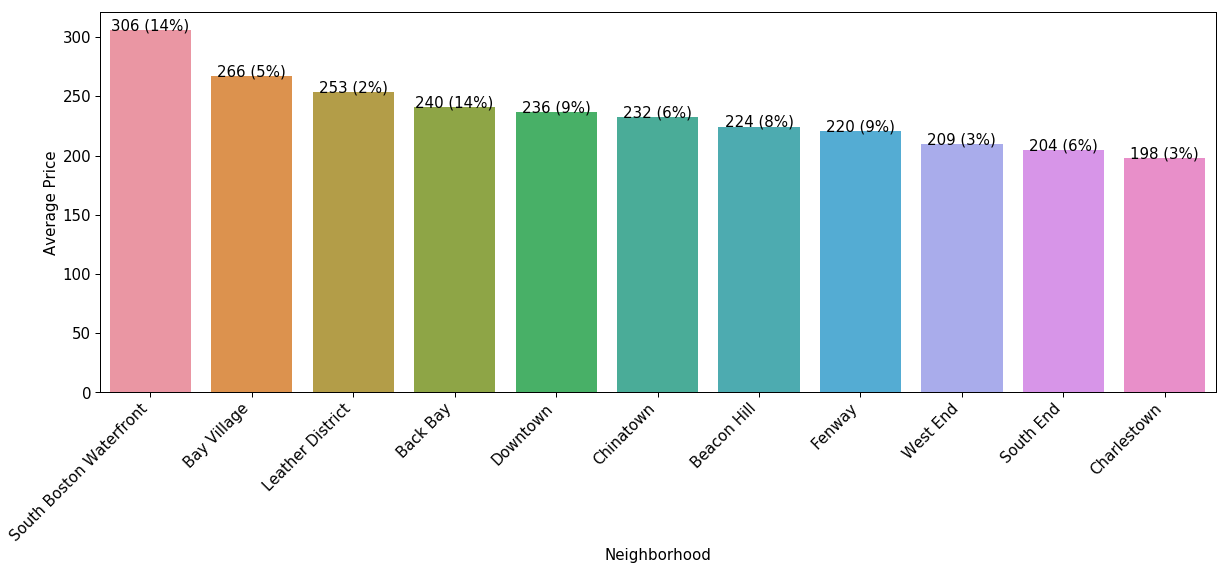

In [137]:
corr_neigh = correlation_summary(location_analysis_x, location_analysis_y, 'Neighborhood', n=10, var = 'neighbourhood_cleansed')

## Analyzing relationship between property attributes and price

In [106]:
prop_att_analysis = listings_calendar[['id','property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price']].copy()
print(prop_att_analysis.shape)
prop_att_analysis.head()

(3585, 9)


,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price
0,12147973,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0
1,3075044,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0
2,6976,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0
3,1436513,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0
4,7651065,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0


In [132]:
prop_att_analysis_x1 = prop_att_analysis.groupby(['id','property_type'])['id'].count().unstack('property_type').fillna(0).reset_index()
prop_att_analysis_x2 = prop_att_analysis.groupby(['id','room_type'])['bedrooms'].sum().unstack('room_type').fillna(0).reset_index()
prop_att_analysis_x3 = prop_att_analysis.groupby(['id','bed_type'])['beds'].sum().unstack('bed_type').fillna(0).reset_index()
prop_att_analysis_x4 = prop_att_analysis.groupby(['id'])['accommodates','bathrooms'].sum().reset_index()

In [108]:
prop_att_analysis_x = prop_att_analysis_x2.merge(prop_att_analysis_x1, how = 'left', on = ['id'])
prop_att_analysis_x = prop_att_analysis_x.merge(prop_att_analysis_x3, how = 'left', on = ['id'])
prop_att_analysis_x = prop_att_analysis_x.merge(prop_att_analysis_x4, how = 'left', on = ['id']).drop(['id'], axis=1).fillna(0)
print(prop_att_analysis_x.shape)
prop_att_analysis_x.head()

(3585, 23)


,Entire home/apt,Private room,Shared room,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,accommodates,bathrooms
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1.0


In [87]:
prop_att_analysis_y = prop_att_analysis.groupby(['id'])['price'].sum().reset_index(drop=True)
prop_att_analysis_y = prop_att_analysis_y / prop_att_analysis_y.mean()

In [88]:
train_x, test_x, train_y, test_y = train_test_split(prop_att_analysis_x, prop_att_analysis_y, test_size = 0.1, random_state = 20191212)

rf = RandomForestRegressor(random_state=20191212, n_estimators=100, max_depth=5)

rf.fit(train_x, train_y)

pred_train = rf.predict(train_x)
pred_test = rf.predict(test_x)

print('Mean absolute error on Train: ', np.sqrt(mean_absolute_error(train_y, pred_train)))
print('Mean absolute error on Test: ', np.sqrt(mean_absolute_error(test_y, pred_test)))

Mean absolute error on Train:  0.5649750781180842
Mean absolute error on Test:  0.5972506210121278


In [89]:
feature_coeff = pd.DataFrame(list(train_x.columns), columns = ['feature'])
feature_coeff['importance'] = rf.feature_importances_
feature_coeff = feature_coeff.sort_values(['importance'], ascending = False).reset_index(drop = True)
feature_coeff.head(10)

,feature,importance
0,Entire home/apt,0.608842
1,bathrooms,0.239836
2,accommodates,0.051236
3,Real Bed,0.031689
4,Private room,0.026847
5,Shared room,0.010971
6,Other,0.008866
7,House,0.007727
8,Apartment,0.005671
9,Villa,0.001521


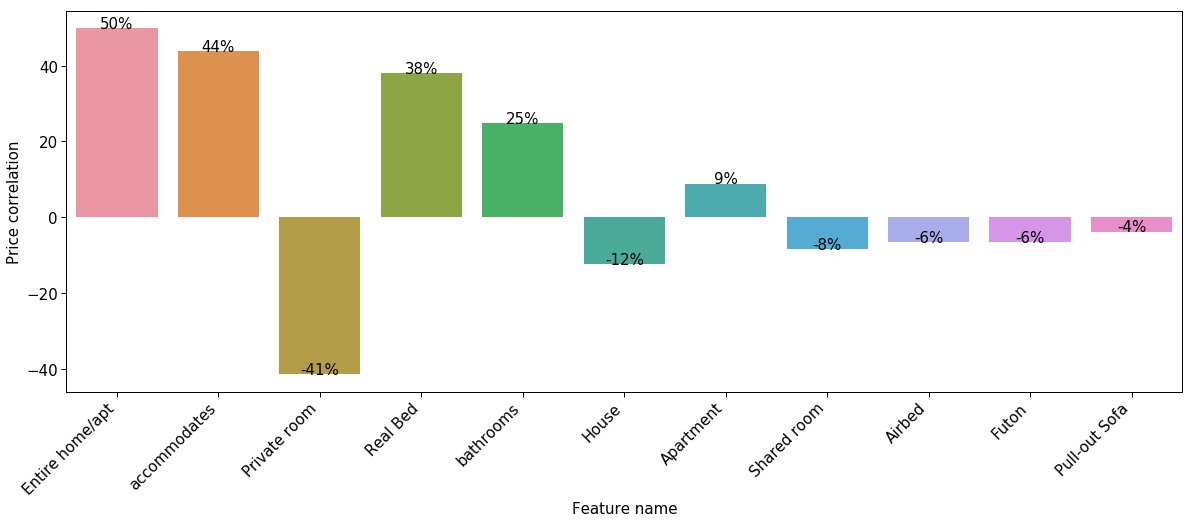

In [90]:
corr_prop = correlation_summary(prop_att_analysis_x, prop_att_analysis_y,n=10)

## Analyzing relationship between property attributes & Neighbourhood and price

In [91]:
full_x = pd.concat([location_analysis_x, prop_att_analysis_x], axis=1)
full_y = location_analysis_y
full_x.shape, full_y.shape

((3585, 48), (3585,))

In [92]:
train_x, test_x, train_y, test_y = train_test_split(full_x, full_y, test_size = 0.2, random_state = 20191212)

rf = RandomForestRegressor(random_state=20191212, n_estimators=100, max_depth=3)

rf.fit(train_x, train_y)

pred_train = rf.predict(train_x)
pred_test = rf.predict(test_x)

print('Mean absolute error on Train: ', np.sqrt(mean_absolute_error(train_y, pred_train)))
print('Mean absolute error on Test: ', np.sqrt(mean_absolute_error(test_y, pred_test)))

Mean absolute error on Train:  0.5778097850217024
Mean absolute error on Test:  0.5835746888038638


In [93]:
feature_coeff = pd.DataFrame(list(train_x.columns), columns = ['feature'])
feature_coeff['importance'] = rf.feature_importances_
feature_coeff = feature_coeff.sort_values(['importance'], ascending = False).reset_index(drop = True)
feature_coeff.head(10)

,feature,importance
0,Entire home/apt,0.653201
1,bathrooms,0.238660
2,Private room,0.029339
3,South Boston Waterfront,0.023354
4,Fenway,0.016197
5,accommodates,0.008759
6,Back Bay,0.007116
7,Shared room,0.006745
8,Downtown,0.005770
9,Real Bed,0.003376


## Correlation Analysis

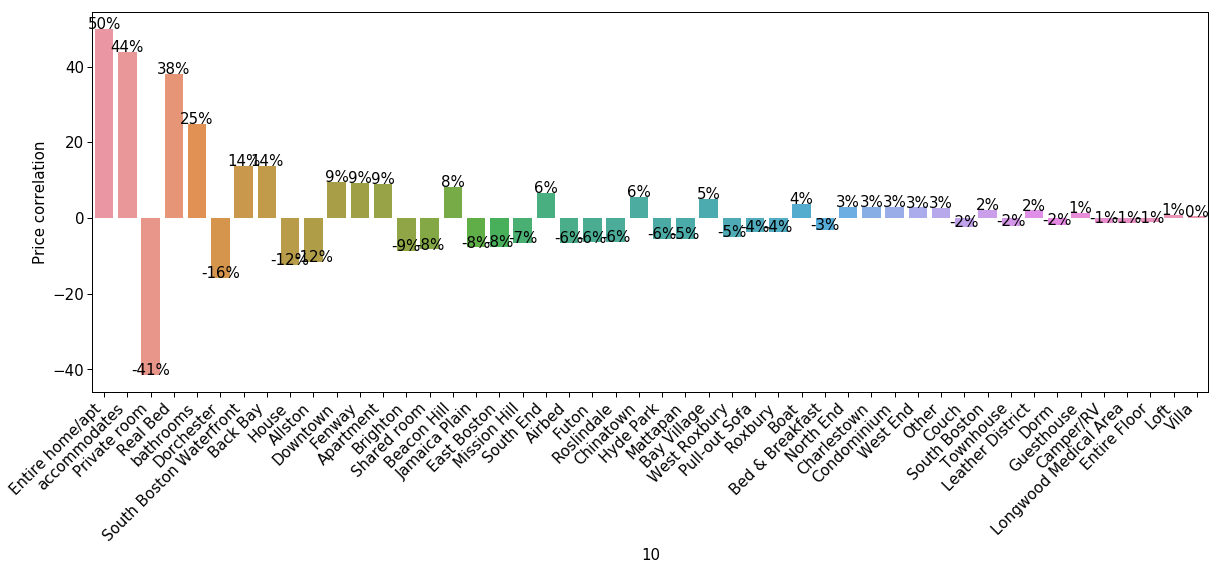

In [138]:
corr_full = correlation_summary(full_x, full_y, 10)

### Correlation with Room type

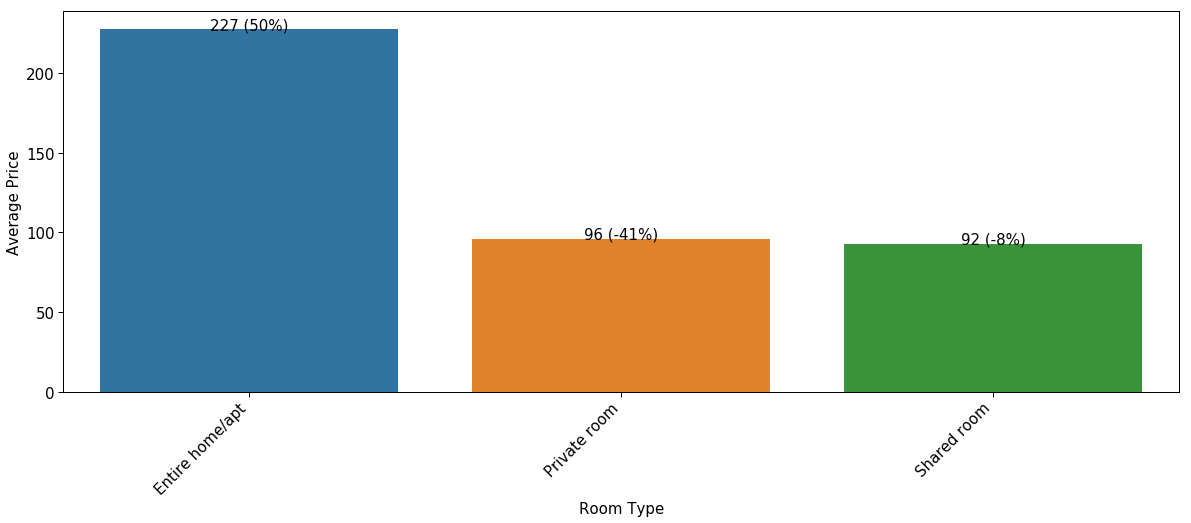

In [127]:
corr_room = correlation_summary(prop_att_analysis_x2.drop(['id'],axis=1), prop_att_analysis_y, 'Room Type', var = 'room_type')

### Correlation with property type

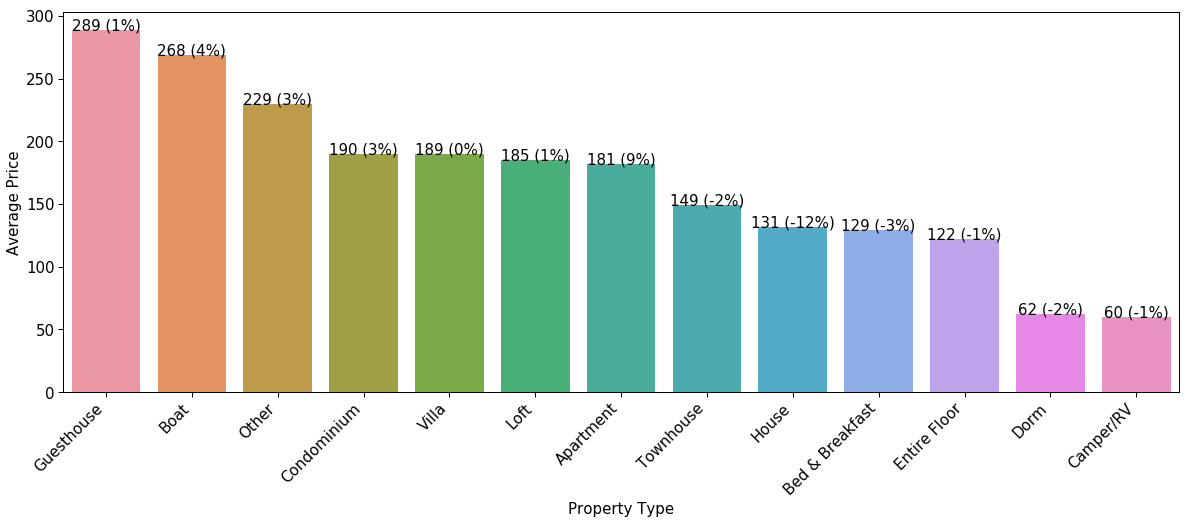

In [133]:
prop_att_analysis_x1 = pd.DataFrame(prop_att_analysis_x2['id'], columns = ['id']).merge(prop_att_analysis_x1, how = 'left', on = ['id']).drop(['id'], axis=1)
corr_property_type = correlation_summary(prop_att_analysis_x1, prop_att_analysis_y, 'Property Type', var= 'property_type')

### Correlation with Bed type

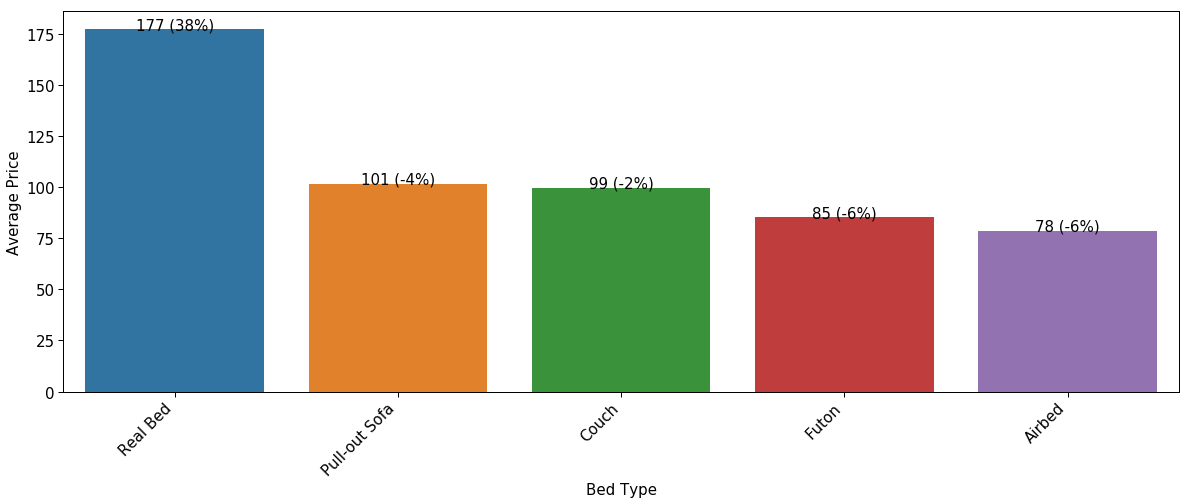

In [135]:
corr_bed_type = correlation_summary(prop_att_analysis_x3.drop(['id'],axis=1), prop_att_analysis_y, 'Bed Type', var= 'bed_type')

### Other property attributes

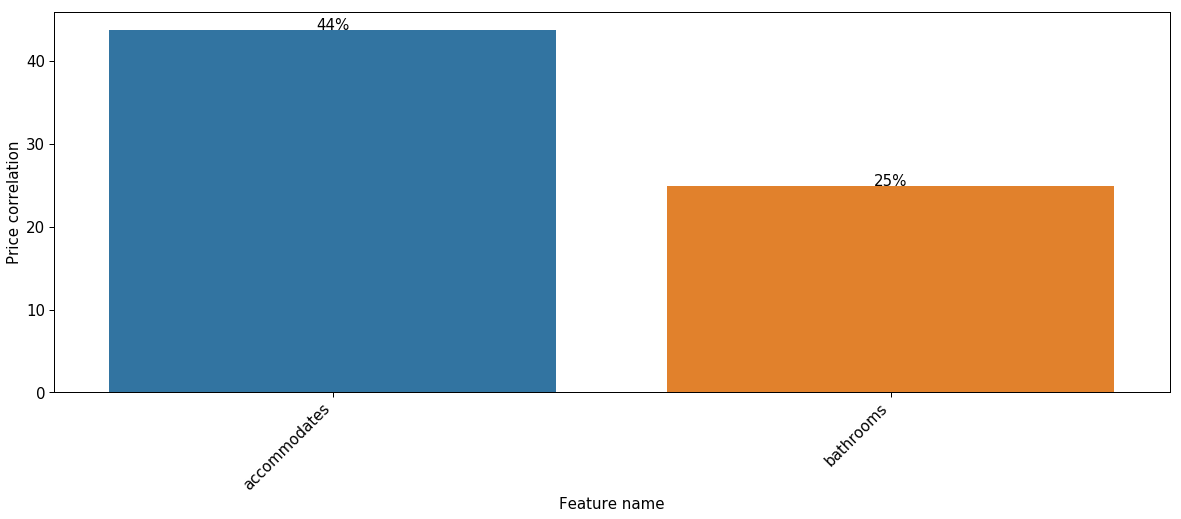

In [100]:
corr_other_att = correlation_summary(prop_att_analysis_x4.drop(['id'],axis=1) , prop_att_analysis_y)